In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.figure import Figure

def create_plot():
    mu, sigma = -846700, 100  
    s = np.random.normal(mu, sigma, 1000)

    fig = Figure(figsize=(5, 4), dpi=100)
    plot = fig.add_subplot(111)
    plot.hist(s, 30, density=True, alpha=0.75, color='blue', edgecolor='black')
    plot.set_xlabel('posterior')
    plot.set_ylabel('frequency')

    return fig

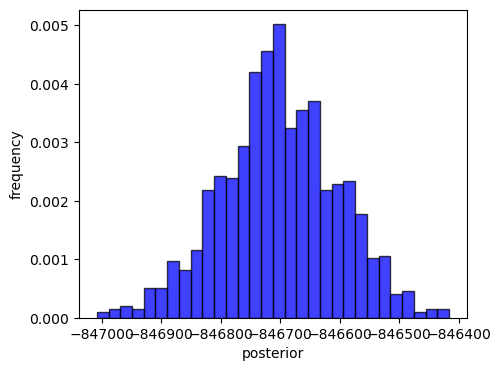

In [24]:
create_plot()

In [25]:
import bar_graph

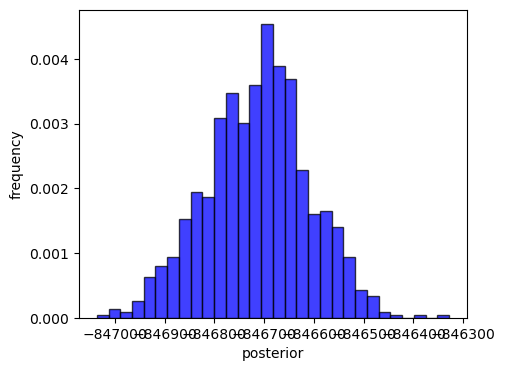

In [26]:
bar_graph.create_plot()

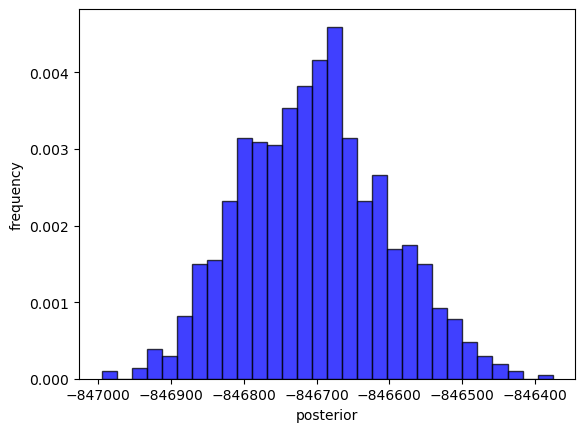

In [27]:
mu, sigma = -846700, 100  
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.75, color='blue', edgecolor='black')

plt.xlabel('posterior')
plt.ylabel('frequency')
plt.show()

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.figure import Figure

def create_plot(graph):
    degrees = [d for n, d in graph.degree()]
    
    fig = Figure(figsize=(5, 4), dpi=100)
    plot = fig.add_subplot(111)
    plot.hist(degrees, bins=np.arange(min(degrees), max(degrees) + 1, 1), density=True, alpha=0.75, color='blue', edgecolor='black')
    plot.set_xlabel('Degree')
    plot.set_ylabel('Frequency')
    plot.set_title('Degree Distribution')

    return fig


In [33]:
def ER_generate(pop_size, p_ER):
     
        ## Generate an Erdős-Rényi graph with 1000 nodes and probability of edge generation being 0.15
    er_graph = nx.erdos_renyi_graph(pop_size, p_ER)

    return(er_graph)
    ## Read the adjascent list and write them into a matrix
    #with open(wk_dir + "contact_network.adjlist.modified", "w") as adjl:
    #    for i in range(pop_size):
    #        int_list = list(er_graph.adj[i])
    #        adjl.write(str(i) + " " + " ".join([str(x) for x in int_list]) + "\n")



def rp_generate(rp_size, p_within, p_between):
    ## Generate a random partition graph with 2 groups, each group having a probability of within-group edge, and there is a between-group edge probability
    rp_graph = nx.random_partition_graph(rp_size, p_within[1], p_between)
    if p_within[0]==p_within[1]:
        higher_density_group = list(rp_graph.graph['partition'][0])
        for i in higher_density_group:
            for j in range(i):
                if j in list(rp_graph.adj[i]):
                    continue
                else:
                    if np.random.uniform(0, 1, 1)[0] <= (p_within[0] - p_within[1]) / (1 - p_within[1]):
                        rp_graph.add_edge(i ,j)
    return(rp_graph)
    #with open(wk_dir + "contact_network.adjlist.modified", "w") as adjl:
    #    for i in range(sum(rp_size)):
    #        int_list = list(rp_graph.adj[i])
    #        adjl.write(str(i) + " " + " ".join([str(x) for x in int_list]) + "\n")

def random_subset(seq,m):

    targets=set()
    while len(targets)<m:
        x=np.random.choice(seq)
        targets.add(x)
    return targets

def ba_generate(pop_size, m):
    G=nx.empty_graph(m)
    G.name="barabasi_albert_graph(%s,%s)"%(pop_size,m)
    # Target nodes for new edges
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=m
    while source<pop_size:
        G.add_edges_from(zip([source]*m,targets))
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source]*m)
        targets = random_subset(repeated_nodes,m)
        source += 1
    ba_graph = G
    return(ba_graph)

In [34]:
pop_size=1000
m = 2

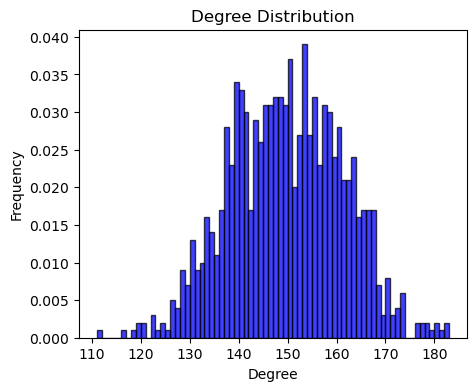

In [35]:
er_graph = ER_generate(pop_size=1000, p_ER=0.15)
fig = create_plot(er_graph)
fig

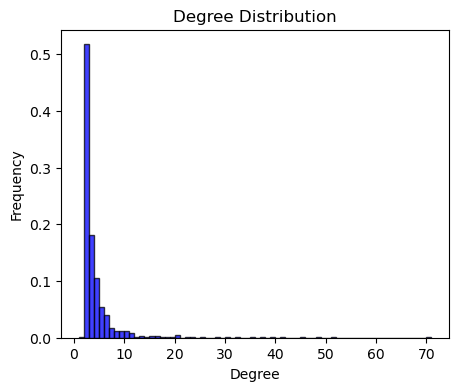

In [36]:
ba_graph = ba_generate(pop_size, m)
fig = create_plot(ba_graph)
fig

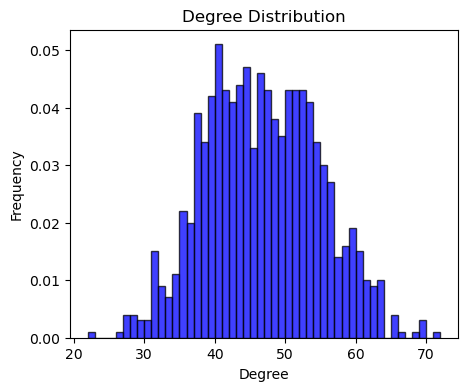

In [42]:
rp_size, p_within, p_between = [400, 600], [0.1, 0.07], 0.02

ba_graph = rp_generate(rp_size, p_within, p_between)
fig = create_plot(ba_graph)
fig